# See untagged bees
- Trying to process image to pick up untagged bees around queen
- See what other bees are doing

In [1]:
%matplotlib inline
#plt.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 20, 16

%load_ext autoreload
%autoreload 2

%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas

Software versions
Python 2.7.12 64bit [GCC 5.4.0 20160609]
IPython 5.4.1
OS Linux 4.10.0 33 generic x86_64 with Ubuntu 16.04 xenial
numpy 1.13.1
scipy 0.19.1
matplotlib 2.0.2
pandas 0.20.3
Thu Aug 31 22:42:54 2017 AEST

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import cv2

import os
import sys

np.random.seed(0)

def view(image):
    plt.figure()
    plt.axis('off')
    plt.imshow(image, cmap = cm.Greys_r)

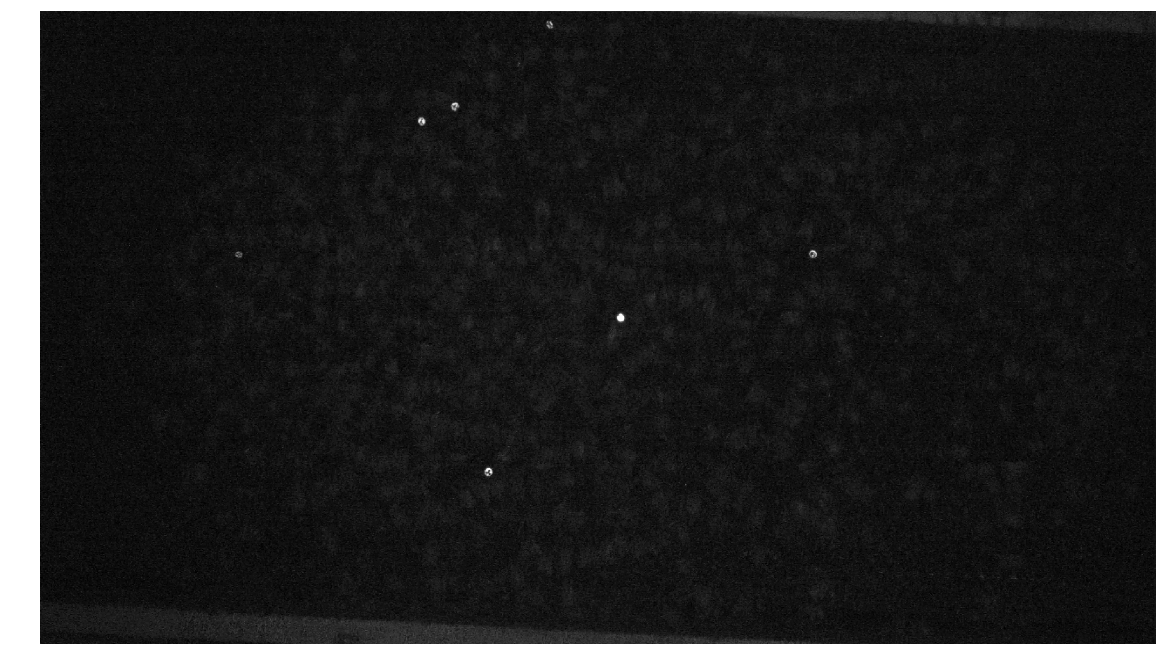

In [3]:
image = cv2.imread('/home/jack/Pictures/vlcsnap-2017-08-30-21h30m37s352.png', cv2.IMREAD_GRAYSCALE)
view(image)

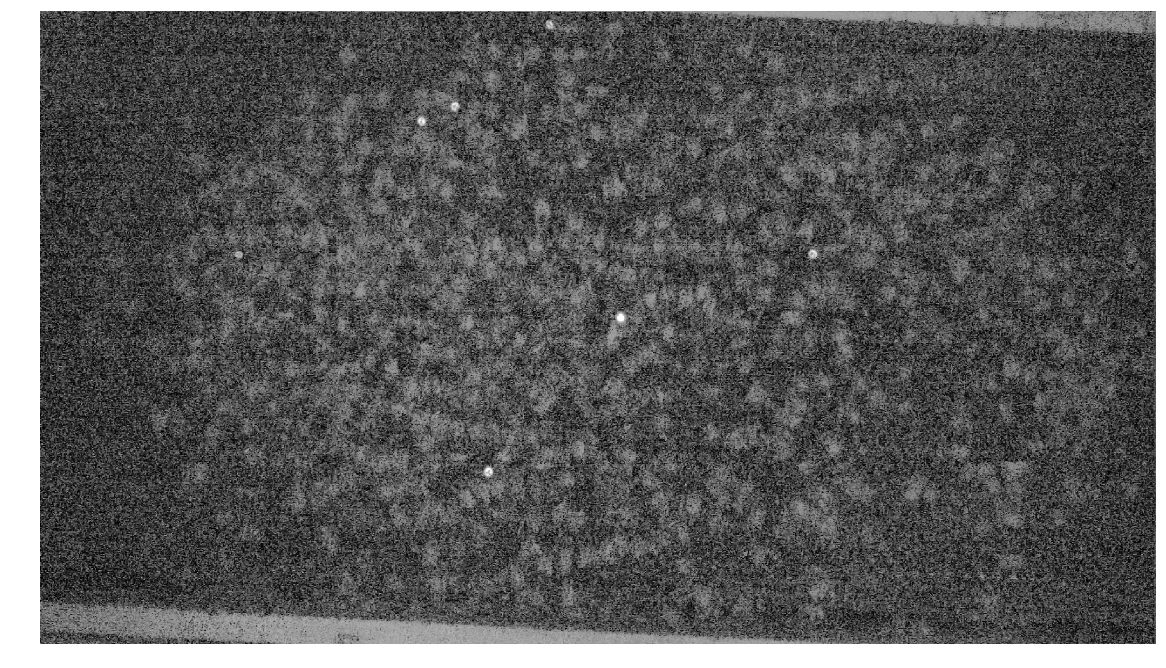

In [4]:
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(3,3))
clahe_img = clahe.apply(image)
view(clahe_img)

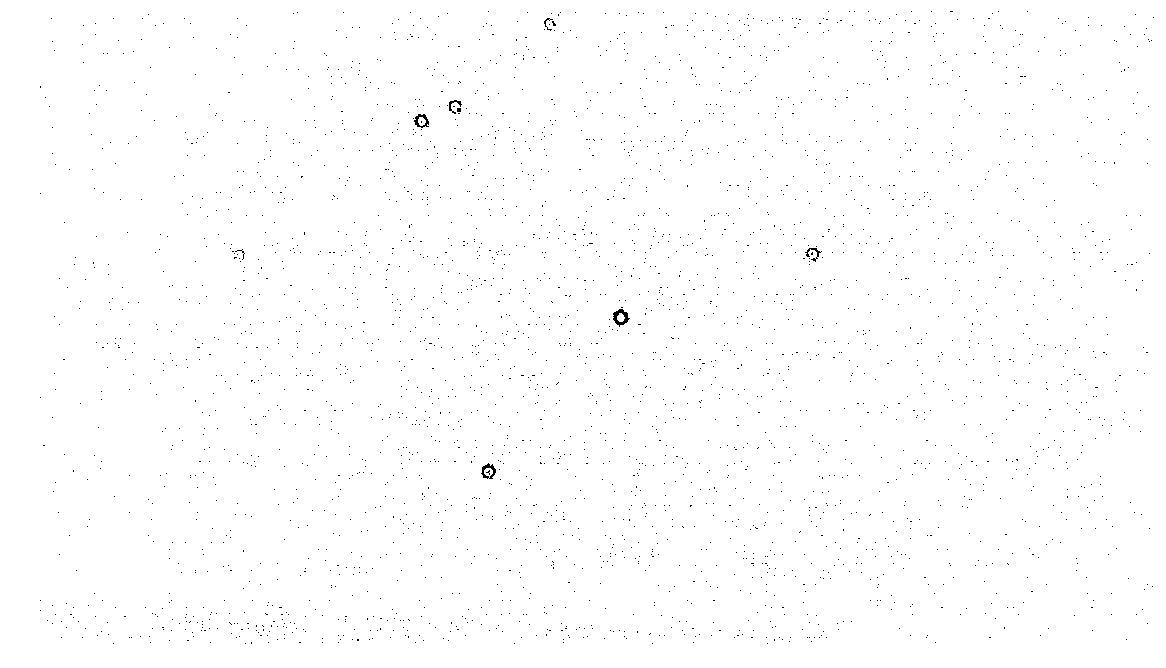

In [5]:
thresh = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,55,11)
view(thresh)

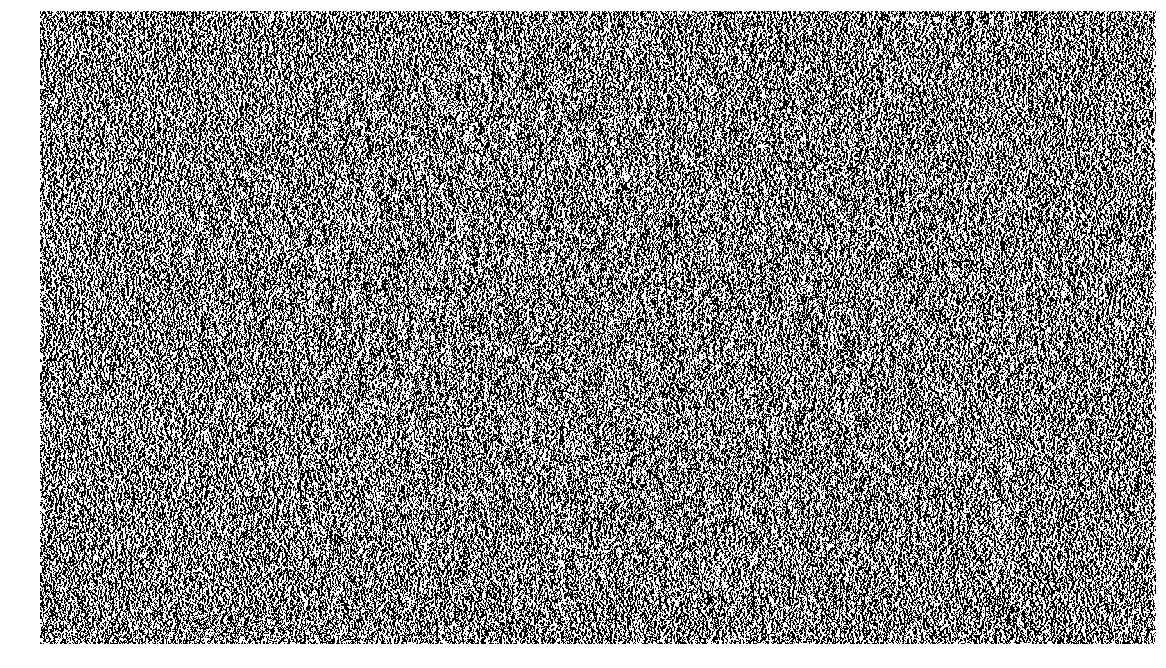

In [27]:
grad_x = cv2.Sobel(image, cv2.CV_16S, 1, 0, ksize=15, scale=11, delta=3, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image, cv2.CV_16S, 0, 1, ksize=15, scale=11, delta=3, borderType=cv2.BORDER_DEFAULT)
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
scharr = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
#ret, thresh = cv2.threshold(scharr, 70, 255, 0)
view(grad_x)

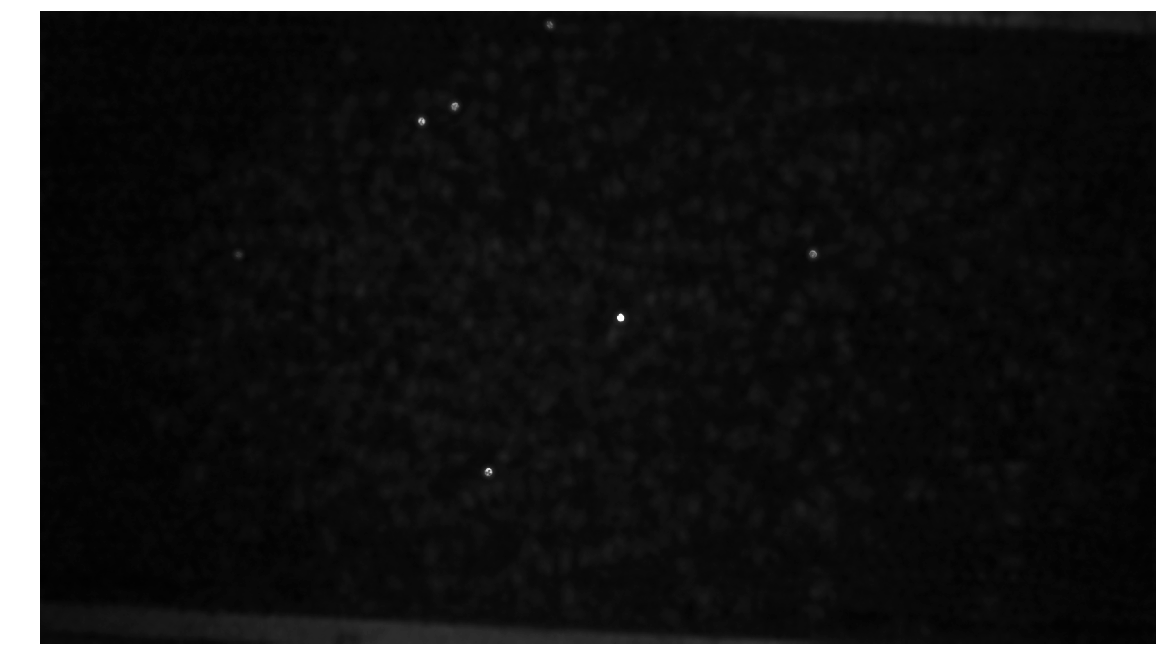

In [8]:
blur = cv2.bilateralFilter(image,33,75,75)
view(blur)

In [9]:
cv2.imwrite('test.png', blur)

True

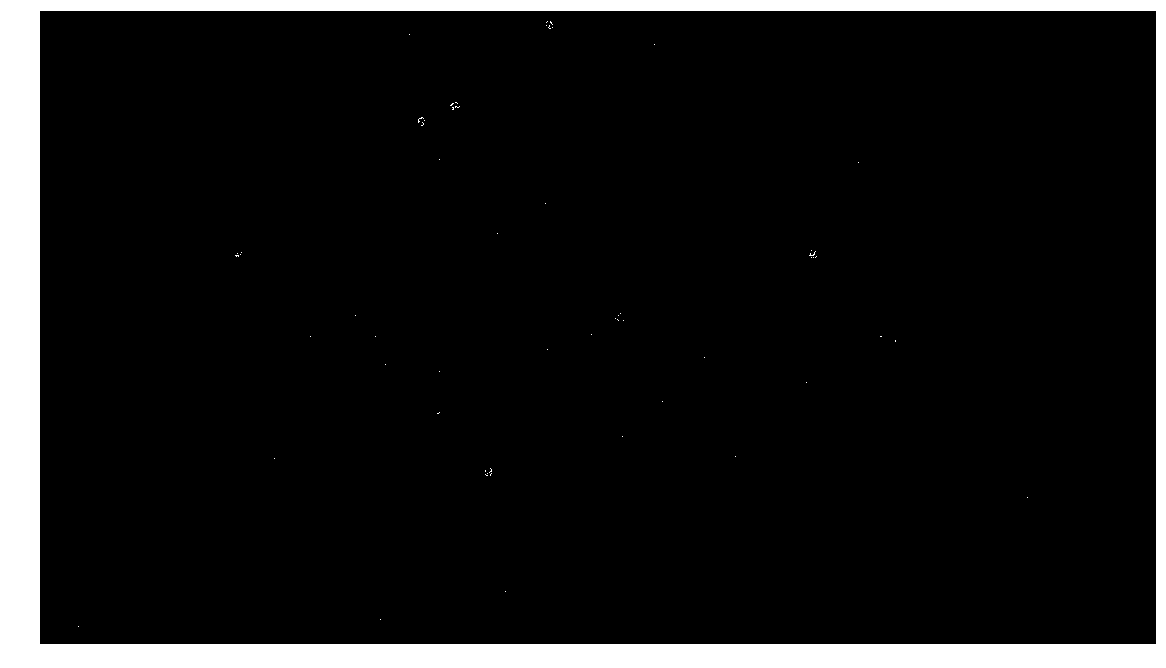

In [19]:
canny = cv2.Canny(image, 111, 111)
view(canny)

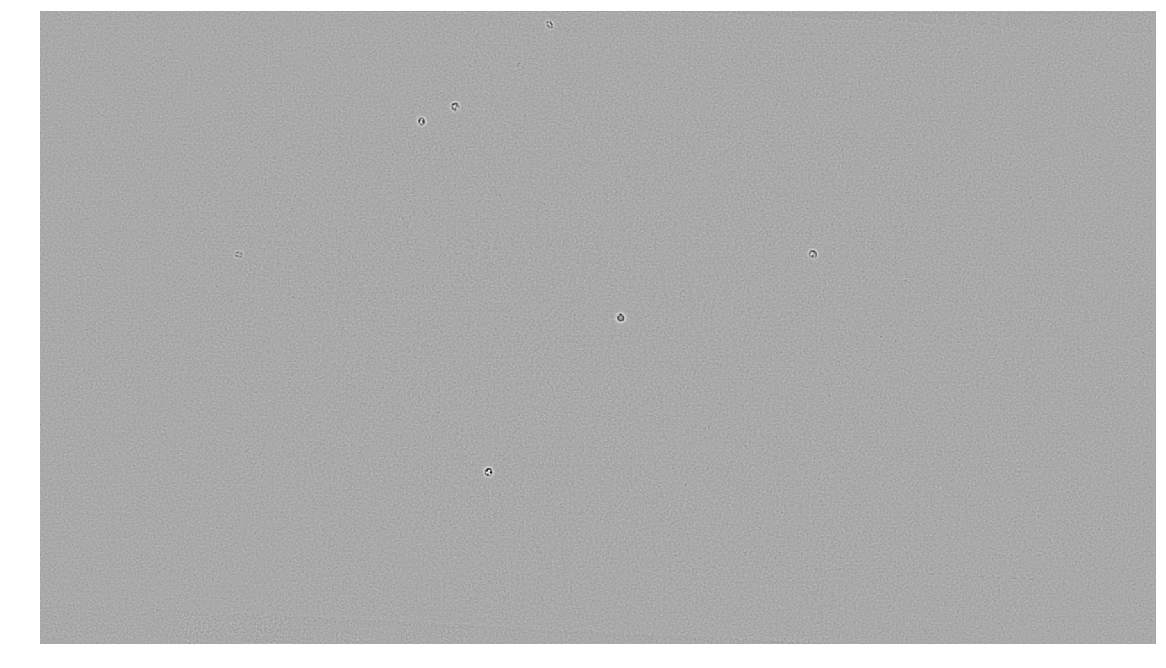

In [36]:
laplacian = cv2.Laplacian(image,cv2.CV_64F, ksize=29, scale=1, delta=3)
view(laplacian)

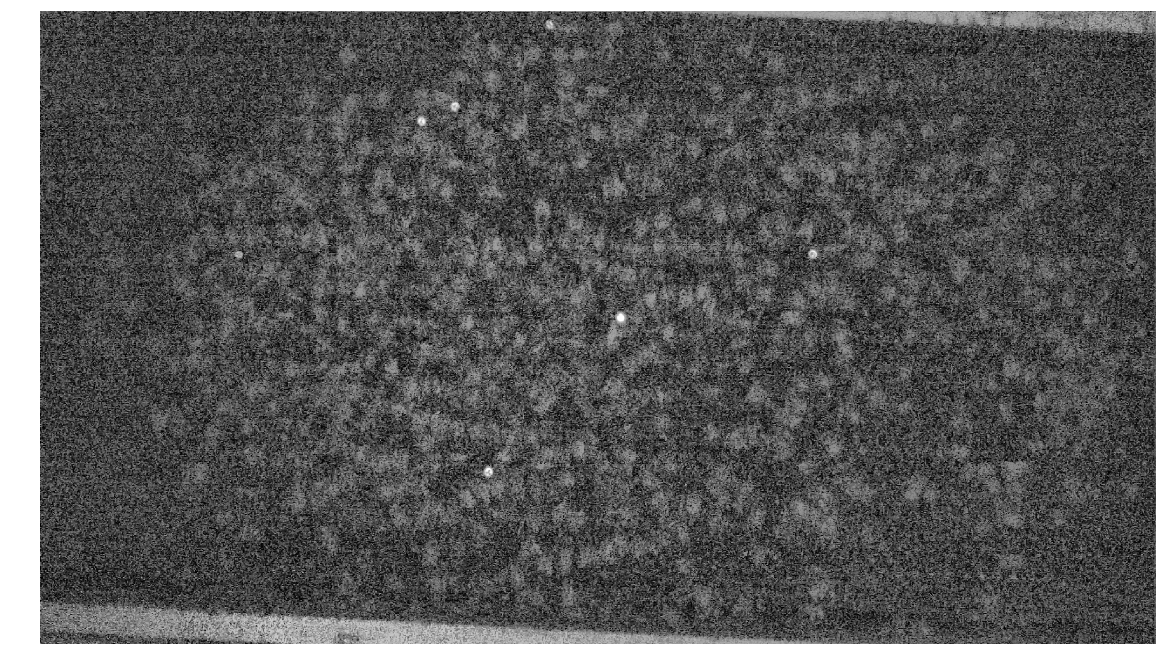

In [69]:
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(7,7))
clahe_img = clahe.apply(image)
view(clahe_img)

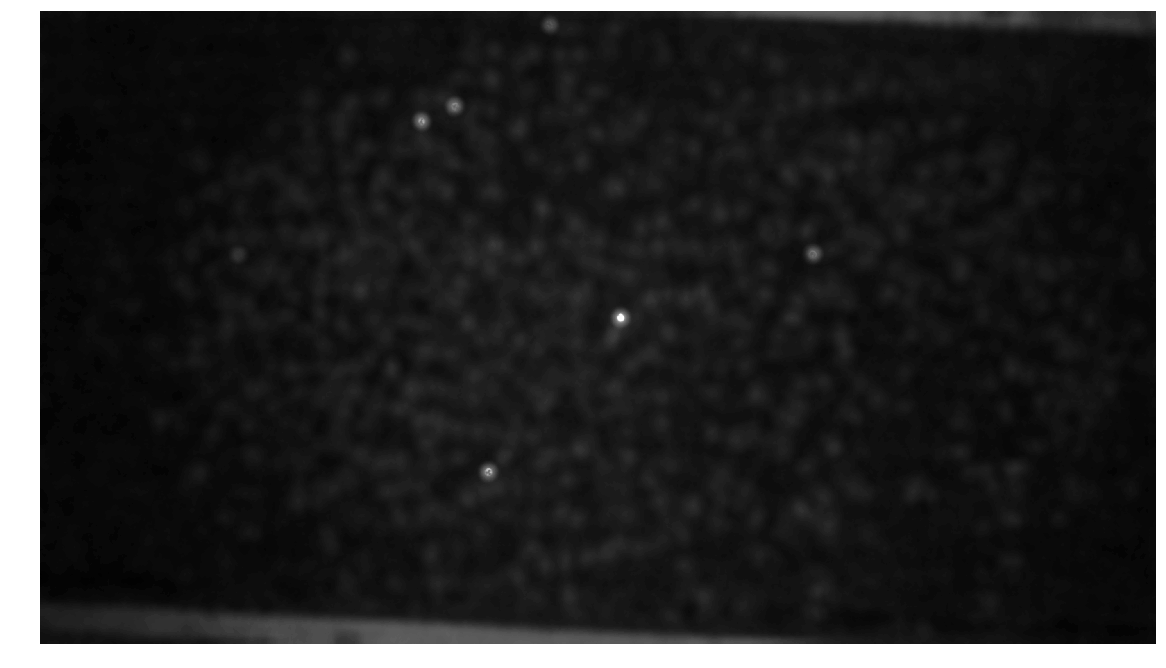

In [70]:
blur = cv2.bilateralFilter(image,55,155,155)
view(blur)

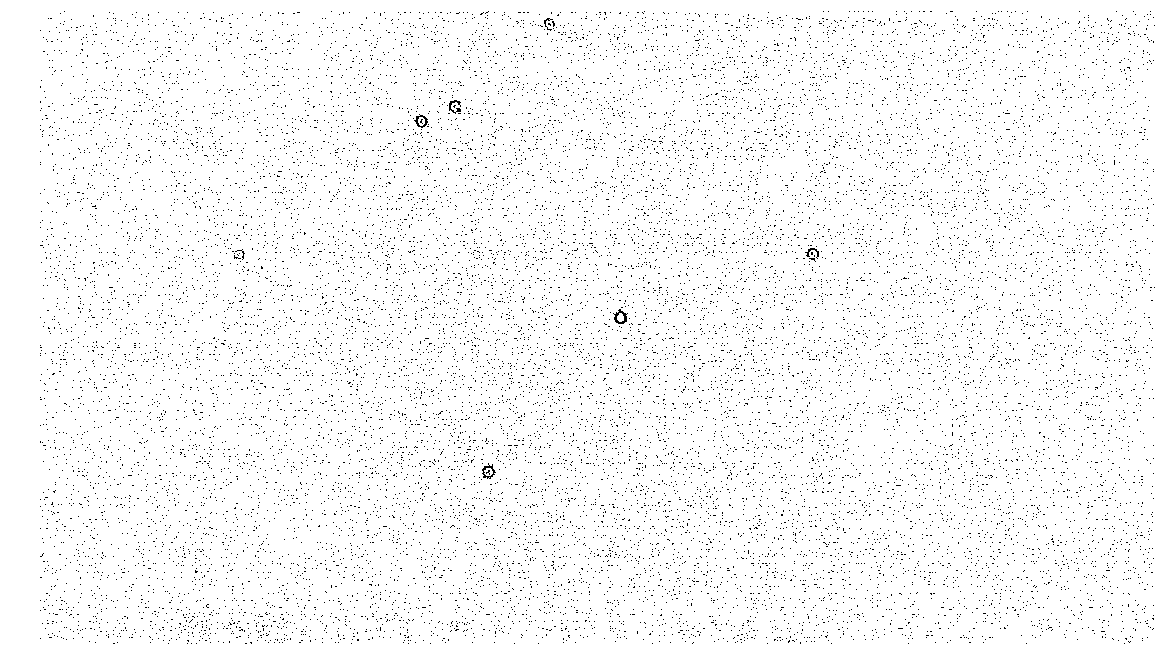

In [71]:
thresh = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,33,7)
view(thresh)